This example aims to have two target orbits, and one observer orbit. The observer is tasked with monitoring the two targets to minimize the trace covariance of the state over the simulation horizon. We use a PPO agent that is rewarded for minimizing the trace covariance of the target states to the best of its ability.

In [1]:
%matplotlib widget
import sys
sys.path.append("../src")

import numpy as np
import matplotlib.pyplot as plt

from SensorTasking.compute_coefficients import SSA_Problem, compute_coefficients, solve_model
from plotting import visualize_info_vs_phase, render

In [2]:
# L2 Halo orbit, period = 3.225 TU  (Target orbit)
x0_1 = np.array([
        1.1540242813087864,
        0.0,
        -0.1384196144071876,
        4.06530060663289e-15,
        -0.21493019200956867,
        8.48098638414804e-15
    ])

# L1 lyapunov, period = 3.225 TU (target orbit)
x0_2 = np.array([
        0.8027692908754149,
        0.0,
        0.0,
        -1.1309830924549648e-14,
        0.33765564334938736,
        0.0
    ])


# 1:1 L2 Lyapunov, period = 6.45 TU (observer orbit)
x0_3 = np.array([
        0.9982702689023665,
        0.0,
        0.0,
        -2.5322340091977996e-14,
        1.5325475708886613,
        0.0
    ])

# 1:1 L1 Lyapunov, period = 6.45 TU (observer orbit)
x0_4 = np.array([
            0.65457084231188,
        0.0,
        0.0,
        3.887957091335523e-13,
        0.7413347560791179,
        0.0
])


# 2:1 Resonant, period = 6.45 TU
x0_5 = np.array([
        0.9519486347314083,
        0.0,
        0.0,
        0.0,
        -0.952445273435512,
        0.0
    ])

# 3:1 Resonant, period = 6.45 TY
x0_6 = np.array([
        0.13603399956670137,
        0.0,
        0.0,
        1.9130717669166003e-12,
        3.202418276067991,
        0.0
    ])



In [3]:
prob = SSA_Problem(target_ics=[x0_1, x0_2], target_periods=[3.225, 3.225], agent_ics=[x0_4, x0_5], agent_periods=[ 6.45,6.45])

In [ ]:
plt.figure(1)
phases = np.linspace(0, 1, 40)
visualize_info_vs_phase(prob, phases, 1, 1)

In [ ]:
plt.figure(2)
phases = np.linspace(0, 1, 40)
visualize_info_vs_phase(prob, phases, 2, 2)

In [ ]:
fig, axs = plt.subplots(2, 3)
fig.suptitle('Observer 2 Information Gain vs. Phase\nat Fixed Observer 1 Phase')

phases = np.linspace(0.0, 1.0, 40)

fixed_phases = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9]

for i, ax in enumerate(axs.flatten()):
    sols = np.zeros_like(phases)
    
    for j, phase in enumerate(phases):
        sols[j] = prob.fitness( [fixed_phases[i], phase])[0]
    
    ax.set_xlabel("Phase")
    ax.set_ylabel("log(f)")
    ax.set_title(f"Obs 1 Phase = {fixed_phases[i]}")
    ax.scatter(phases, np.log(-sols), color = "blue", marker='.', label="optimal info. gain", s=2)

    
plt.tight_layout()
plt.show()

In [ ]:

# Define the function
f = lambda x, y: np.log(-prob.fitness( [x, y])[0])

# Generate data
x = np.linspace(0, 0.1, 40)
y = np.linspace(0, 0.1, 40)

Z = np.zeros(shape=(y.size, x.size))

# Evaluate the function at each point
for i in range(len(x)):
    for j in range(len(y)):
        Z[j, i] = f(x[i], y[j])



In [ ]:
plt.close(2)
plt.figure(2)
# Create contour plot
plt.contourf(x, y, Z, cmap='viridis')

# Add labels and title
plt.colorbar(label =  "log(f)")
plt.grid(True)
plt.xlabel('Obs 1 Phase')
plt.ylabel('Obs 2 Phase')
plt.title('Contours of Information Gain')
plt.show()

In [ ]:
plt.close(3)
plt.figure(3)
plt.xlabel("Phase")
plt.ylabel("log(f)")
plt.title("Observer 2 Information Gain")
plt.scatter(np.linspace(0, 0.1, 40), Z[:, -1], color = "blue", marker='.', label="optimal")
plt.grid(True)
plt.show()

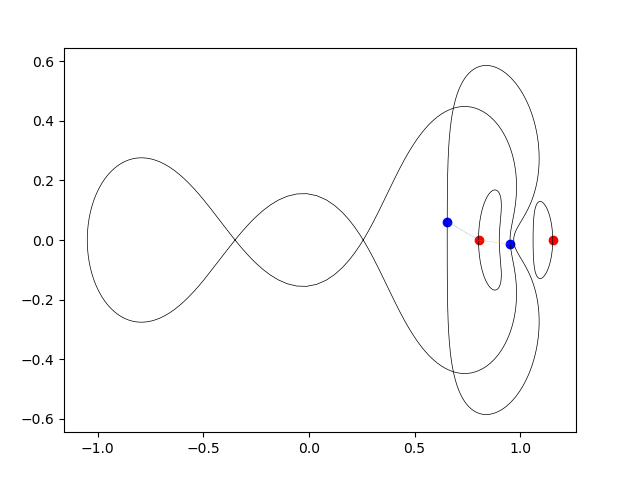

In [6]:
ani= render(prob, [0.013, 0.0023], fig=3, control=None)

In [ ]:
phases = np.linspace(0, 1, 40)
sols = np.zeros_like(phases)

for i, phase in enumerate(phases):
    sols[i] = prob.fitness( [0.0, phase])[0]


In [ ]:
# sub region of the original image
x1, x2, y1, y2 = 0.0, 0.005, 24.86, 24.87


zoomed_phases = np.linspace(x1, x2, 40)
zoomed_info = np.log([-prob.fitness([0.0, phase])[0] for phase in zoomed_phases])

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

plt.close(27)
fig, ax = plt.subplots()

ax.set_xlabel("Phase")
ax.set_ylabel("log(f)")
ax.set_title("Observer 2 Information Gain\nwith Fixed Observer 1 Phase")

# extent = [-3, 4, -4, 3]
ax.scatter(phases, np.log(-sols), color = "blue", marker='.', label="optimal")
ax.set_ylim(top=25)
ax.axvline(0.0023, color="red", linestyle="--", linewidth=0.7)

axins = zoomed_inset_axes(ax, 20, loc=9) # zoom = 6

axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

axins.scatter(zoomed_phases, zoomed_info, color = "blue", marker='.', s=2)
axins.axvline(0.0023, color="red", linestyle="--", linewidth=0.7)

axins.yaxis.tick_right()

plt.xticks([0.0023])
plt.yticks(visible=True)


# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")

plt.draw()
plt.show()